<a href="https://colab.research.google.com/github/ElevenRitual-cyber/NLP_/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import kagglehub
import pandas as pd
import os
# Define the dataset ID
dataset_id = "kazanova/sentiment140"
# Download the dataset and get the path
dataset_path = kagglehub.dataset_download(dataset_id)
print("Path to dataset files:", dataset_path)
# Manually construct the file path (check the actual file name after extraction)
file_name = "training.1600000.processed.noemoticon.csv"
file_path = os.path.join(dataset_path, file_name)
# Ensure the file exists
if os.path.exists(file_path):
    # Load the dataset using pandas
    df = pd.read_csv(file_path, encoding="ISO-8859-1", header=None)

    # Display the first 5 records
    print("First 5 records:\n", df.head())
else:
    print(f"Error: The file '{file_name}' was not found in '{dataset_path}'.")


100%|██████████| 80.9M/80.9M [00:01<00:00, 53.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2
First 5 records:
    0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## There are six columns with numbering 1 to 6 so , we are renaming it


target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

## Setting the Columns of

In [ ]:
df.columns=['Target','ids','date','flag','user','text']
 # Show all rows

In [ ]:
## Geting the basic idea about dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


,Target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.tail()

,Target,ids,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


## Checking for the null values

In [ ]:
df.isna().sum()

,0
Target,0
ids,0
date,0
flag,0
user,0
text,0


## Convert the text(tweets) to lowercase

In [ ]:
df['text']=df['text'].str.lower()

###  Removing URLs, Mentions (@user), and Hashtags (#hashtag).


In [ ]:
## .str.replace(pattern, replacement, regex=True)
df['text']=df['text'].replace(r'@\w+|#\w+','',regex=True)

###	 Removing Punctuation, Special Characters, and Extra Spaces.


In [ ]:
df['text']=df['text'].replace(r'[^a-zA-Z0-9\s]','',regex=True)

In [ ]:
df['text']

,text
0,httptwitpiccom2y1zl awww thats a bummer you...
1,is upset that he cant update his facebook by t...
2,i dived many times for the ball managed to sa...
3,my whole body feels itchy and like its on fire
4,no its not behaving at all im mad why am i he...
...,...
1599995,just woke up having no school is the best feel...
1599996,thewdbcom very cool to hear old walt intervie...
1599997,are you ready for your mojo makeover ask me fo...
1599998,happy 38th birthday to my boo of alll time tup...


## Removing Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# kuch="Hey this is mayank patel from LA"
# words=word_tokenize(kuch)
# print(words)
# stop=set(stopwords.words('english'))
# filters=[w for w in words if w not in stop]
# print(filters)
def remove_stop_words(sentence):
    tokens=word_tokenize(sentence)
    stop_words=set(stopwords.words('english'))
    filtered=[w for w in tokens if  w not in stop_words]
    return filtered

In [ ]:
df['text']=df['text'].apply(remove_stop_words)
df.head(10)

,Target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"[httptwitpiccom2y1zl, awww, thats, bummer, sho..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,"[upset, cant, update, facebook, texting, might..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,"[dived, many, times, ball, managed, save, 50, ..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,"[whole, body, feels, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"[behaving, im, mad, cant, see]"
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,"[whole, crew]"
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,"[need, hug]"
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"[hey, long, time, see, yes, rains, bit, bit, l..."
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,"[nope, didnt]"
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,"[que, muera]"


### Converting words to their base or root form (lemma)

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: Helps with additional WordNet mappings
nltk.download('averaged_perceptron_tagger')  # Required for POS tagging


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
lemmatizer=WordNetLemmatizer()

### Part of speech taggin

In [ ]:
from nltk import wordnet
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
df

,Target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"[httptwitpiccom2y1zl, awww, thats, bummer, sho..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,"[upset, cant, update, facebook, texting, might..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,"[dived, many, times, ball, managed, save, 50, ..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,"[whole, body, feels, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"[behaving, im, mad, cant, see]"
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,"[woke, school, best, feeling, ever]"
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,"[thewdbcom, cool, hear, old, walt, interviews,..."
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,"[ready, mojo, makeover, ask, details]"
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,"[happy, 38th, birthday, boo, alll, time, tupac..."


##  Perform POS Tagging
##  Convert POS Tags to WordNet Format
##  Lemmatize Words Using the Correct POS Tags

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ  # Adjective
    elif tag.startswith('V'):
        return wordnet.VERB  # Verb
    elif tag.startswith('N'):
        return wordnet.NOUN  # Noun
    elif tag.startswith('R'):
        return wordnet.ADV  # Adverb
    else:
        return wordnet.NOUN  # Default to noun

In [ ]:
pos_tags=df['text'].apply(nltk.pos_tag)

In [ ]:
def lemma_da_words(pos_token):
  lemma_words= [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_token]
  return lemma_words


In [ ]:
df['text']=pos_tags.apply(lemma_da_words)

# Exploratory Data Analysis(EDA)


### Check Sentiment Distribution


In [ ]:
sentiment_count=df['Target'].value_counts()

In [ ]:
# !pip install matplot

In [ ]:
import matplotlib.pyplot as plt


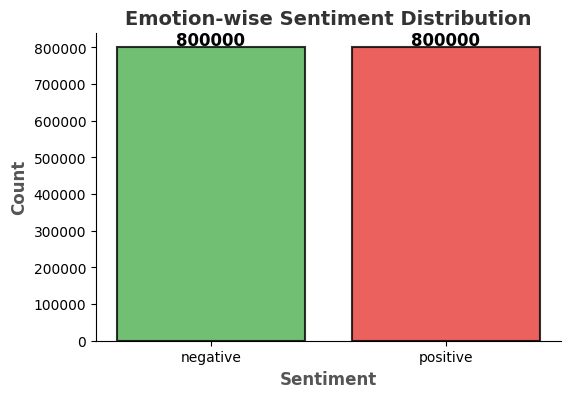

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences
negative = df.loc[df['Target'] == 0, 'Target'].count()
positive = df.loc[df['Target'] == 4, 'Target'].count()

# Define labels, values & colors
x = ['negative', 'positive']
y = [negative, positive]
colors = ['#4CAF50', '#E53935']  # Soft green & red

# Create figure
plt.figure(figsize=(6, 4), dpi=100)
plt.bar(x, y, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels on bars
for i, v in enumerate(y):
    plt.text(i, v + 5000, str(v), ha='center', fontsize=12, fontweight='bold', color='black')

# Title & labels
plt.title("Emotion-wise Sentiment Distribution", fontsize=14, fontweight='bold', color='#333')
plt.xlabel("Sentiment", fontsize=12, fontweight='bold', color='#555')
plt.ylabel("Count", fontsize=12, fontweight='bold', color='#555')

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()


## Getting the bigrams

In [ ]:
import numpy as np
from nltk.util import bigrams

In [ ]:
pmask=df['Target']==4
nmask=df['Target']==0
postive_token=df[pmask]['text']
negative_token=df[nmask]['text']
negative_token

,text
0,"[httptwitpiccom2y1zl, awww, thats, bummer, sho..."
1,"[upset, cant, update, facebook, texting, might..."
2,"[dive, many, time, ball, manage, save, 50, res..."
3,"[whole, body, feel, itchy, like, fire]"
4,"[behave, im, mad, cant, see]"
...,...
799995,"[sick, spending, day, lay, bed, listen]"
799996,[gmail]
799997,"[rest, peace, farrah, sad]"
799998,"[sound, like, rival, flag, ad, much, though]"


In [ ]:
postive_token

,text
800000,"[love, u, guy, r, best]"
800001,"[im, meet, one, besties, tonight, cant, wait, ..."
800002,"[thanks, twitter, add, sunisa, get, meet, hin,..."
800003,"[sick, really, cheap, hurt, much, eat, real, f..."
800004,"[effect, everyone]"
...,...
1599995,"[woke, school, best, feeling, ever]"
1599996,"[thewdbcom, cool, hear, old, walt, interview, ..."
1599997,"[ready, mojo, makeover, ask, detail]"
1599998,"[happy, 38th, birthday, boo, alll, time, tupac..."


In [ ]:
postive_bigrams_list = [list(bigrams(tokens)) for tokens in postive_token]
negative_bigram_list=[list(bigrams(token)) for token in negative_token]

In [ ]:
from itertools import chain
from collections import Counter

In [ ]:
import seaborn as sns

In [ ]:
def show_graphs(bgrams, name, top):
    all_grams = list(chain(*bgrams))  # Flatten the list of bigrams
    all_grams_count = Counter(all_grams)
    top_20 = all_grams_count.most_common(top)

    bigrams_labels, bigrams_freqs = zip(*top_20)
    bigrams_labels = [" ".join(pair) for pair in bigrams_labels]  # Convert tuples to strings

    # Set Seaborn style for better visuals
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))  # Adjusted width and height for better readability

    # Create a color gradient
    colors = sns.color_palette("Blues_r", len(bigrams_labels))

    plt.barh(bigrams_labels, bigrams_freqs, color=colors)

    plt.xlabel("Frequency", fontsize=14, fontweight='bold', color="darkblue")
    plt.ylabel("Bigrams", fontsize=14, fontweight='bold', color="darkblue")
    plt.title(f"🔹 Top {top} Most Frequent {name} Bigrams 🔹", fontsize=16, fontweight='bold', color="darkred")

    plt.gca().invert_yaxis()  # Show the highest frequency at the top
    plt.grid(axis='x', linestyle="--", alpha=0.6)  # Add subtle grid lines

    plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


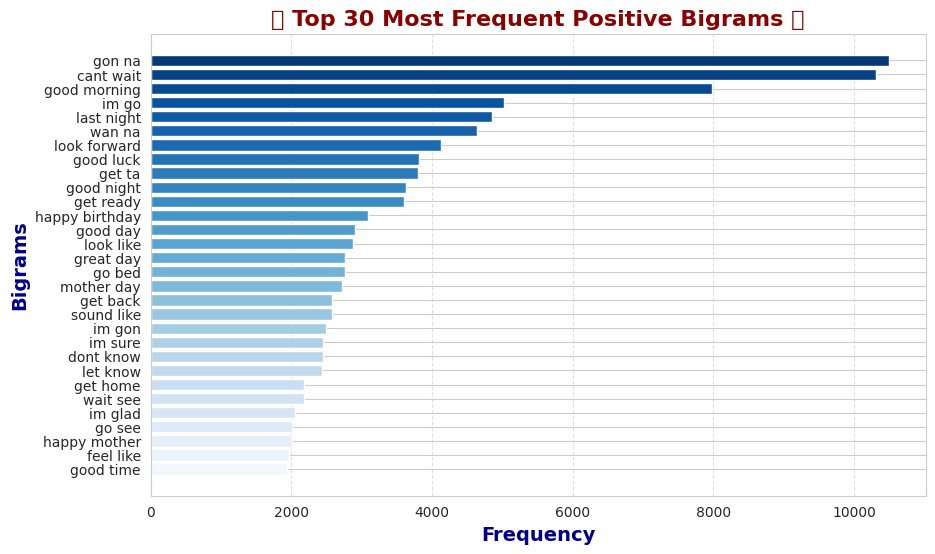

In [ ]:
show_graphs(postive_bigrams_list,"Positive",30)

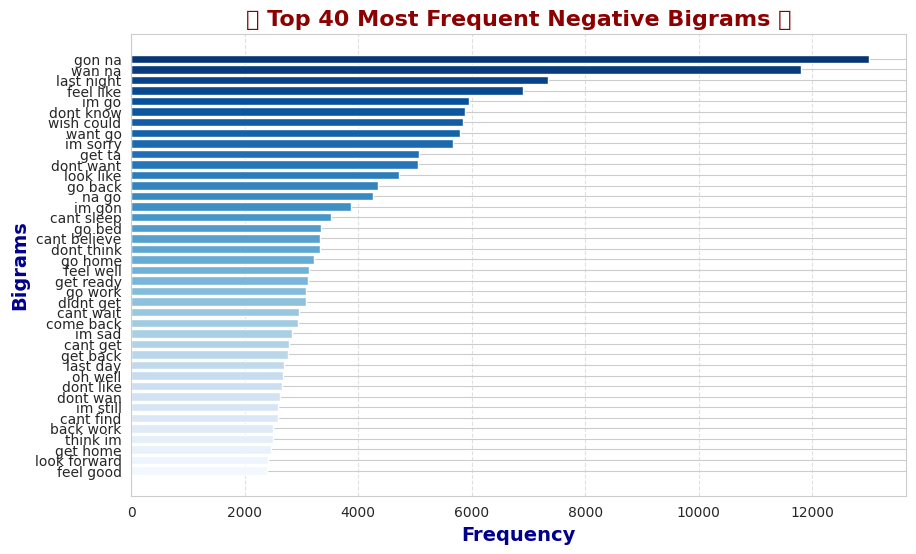

In [ ]:
show_graphs(negative_bigram_list,"Negative",40)

# Model Selections

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
bigrams = postive_bigrams_list + negative_bigram_list
labels = [1] * len(postive_bigrams_list) + [0] * len(negative_bigram_list)

In [ ]:
documents = [" ".join(["_".join(bigram) for bigram in doc]) for doc in bigrams]

In [ ]:
# 1️⃣ Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.3, random_state=42)

# 2️⃣ Convert Bigrams to Feature Matrix
# vectorizer = CountVectorizer()  # No need for `ngram_range=(2,2)` since you already have bigrams
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 3️⃣ Train Naïve Bayes Model
model = MultinomialNB(alpha=0.9)
model.fit(X_train_vectorized, y_train)

# 4️⃣ Predict on Test Data
y_pred = model.predict(X_test_vectorized)

# 5️⃣ Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.73929375
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74    240639
           1       0.73      0.75      0.74    239361

    accuracy                           0.74    480000
   macro avg       0.74      0.74      0.74    480000
weighted avg       0.74      0.74      0.74    480000



In [ ]:
# 6️⃣ Predict Sentiment for New Bigrams
new_bigrams = ["bad_pic not_good", "hate_this this_bad bad_experience"]
new_bigrams_vectorized = vectorizer.transform(X_test)
predictions = model.predict(new_bigrams_vectorized)

# Print Predictions
for bigram, sentiment in zip(X_test, predictions):
    print(f"Bigram: {bigram} → Sentiment: {'positive' if sentiment == 1 else 'negative'}")

Streaming output truncated to the last 5000 lines.
Bigram: right_back back_work3 work3_hour hour_gojust gojust_get get_free free_snicker snicker_ice ice_cream cream_due due_heat heat_woot woot_car car_insurance insurance_isnt isnt_bad bad_time → Sentiment: negative
Bigram: bad_im im_work → Sentiment: negative
Bigram: haha_vote vote_jump jump_front front_straight straight_away away_one one_point → Sentiment: positive
Bigram: im_next → Sentiment: negative
Bigram: text_delete delete_landi landi_miss miss_certain certain_one one_lotttt → Sentiment: negative
Bigram:  → Sentiment: positive
Bigram: oh_ok ok_youre youre_bos → Sentiment: positive
Bigram: thing_well well_huh → Sentiment: negative
Bigram: go_movie movie_mom mom_dad dad_haha haha_im im_lame → Sentiment: positive
Bigram: rise_grey grey_chat chat_youre youre_one one_miss miss_complete complete_original original_coven → Sentiment: positive
Bigram: lay_pool pool_alllll alllll_day → Sentiment: positive
Bigram: thankies_btw btw_fauxnews

In [ ]:
# 6️⃣ Predict Sentiment for New Bigrams
new_bigrams = [
    # Positive Bigrams
    ("love", "this"), ("happy", "day"), ("great", "time"), ("amazing", "experience"), ("best", "moment"),
    ("beautiful", "place"), ("wonderful", "feeling"), ("exciting", "news"), ("super", "fun"), ("fantastic", "event"),
    ("good", "vibes"), ("positive", "energy"), ("peaceful", "mind"), ("successful", "attempt"), ("bright", "future"),
    ("helpful", "person"), ("kind", "words"), ("friendly", "smile"), ("sweet", "memory"), ("enjoying", "life"),

    # Negative Bigrams
    ("hate", "this"), ("bad", "day"), ("terrible", "experience"), ("worst", "time"), ("awful", "moment"),
    ("disgusting", "food"), ("horrible", "place"), ("sad", "feeling"), ("worried", "about"), ("dark", "thoughts"),
    ("painful", "memory"), ("failed", "attempt"), ("ruined", "plan"), ("fearful", "mind"), ("hopeless", "situation"),
    ("annoying", "people"), ("unfair", "decision"), ("angry", "reaction"), ("stressful", "day"), ("lost", "opportunity"),


]

new_bigrams_vectorized = vectorizer.transform(X_test)
predictions = model.predict(new_bigrams_vectorized)

# Print Predictions
for bigram, sentiment in zip(new_bigrams, predictions):
    print(f"Bigram: {bigram} → Sentiment: {'positive' if sentiment == 1 else 'negative'}")

Bigram: ('love', 'this') → Sentiment: positive
Bigram: ('happy', 'day') → Sentiment: positive
Bigram: ('great', 'time') → Sentiment: positive
Bigram: ('amazing', 'experience') → Sentiment: positive
Bigram: ('best', 'moment') → Sentiment: positive
Bigram: ('beautiful', 'place') → Sentiment: negative
Bigram: ('wonderful', 'feeling') → Sentiment: negative
Bigram: ('exciting', 'news') → Sentiment: negative
Bigram: ('super', 'fun') → Sentiment: positive
Bigram: ('fantastic', 'event') → Sentiment: positive
Bigram: ('good', 'vibes') → Sentiment: negative
Bigram: ('positive', 'energy') → Sentiment: positive
Bigram: ('peaceful', 'mind') → Sentiment: negative
Bigram: ('successful', 'attempt') → Sentiment: negative
Bigram: ('bright', 'future') → Sentiment: positive
Bigram: ('helpful', 'person') → Sentiment: negative
Bigram: ('kind', 'words') → Sentiment: positive
Bigram: ('friendly', 'smile') → Sentiment: negative
Bigram: ('sweet', 'memory') → Sentiment: negative
Bigram: ('enjoying', 'life') → Se